In [5]:
# Store the API key as a string - according to PEP8, constants are always named in all upper case
API_KEY = '6K9fpoeEiDL7UtyVEyzP'

In [109]:
# First, import the relevant modules
import requests
import json
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 1:Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the whole year 2017 

In [101]:
url = "https://www.quandl.com/api/v3/datasets/FSE/AFX_X/data.json?&start_date=2007-01-01&end_date=2007-12-31&api_key="+API_KEY
r = requests.get(url)
r.status_code   #A 2XX response indicates that the request was processed successfully.

200

In [ ]:
# 2:Convert the returned JSON object into a Python dictionary.

In [9]:
afx_data = r.json()

In [10]:
type(afx_data)

dict

In [101]:
afx_data

{'dataset_data': {'limit': None,
  'transform': None,
  'column_index': None,
  'column_names': ['Date',
   'Open',
   'High',
   'Low',
   'Close',
   'Change',
   'Traded Volume',
   'Turnover',
   'Last Price of the Day',
   'Daily Traded Units',
   'Daily Turnover'],
  'start_date': '2007-01-01',
  'end_date': '2007-12-31',
  'frequency': 'daily',
  'data': [['2007-12-31',
    None,
    None,
    None,
    11.95,
    None,
    0.0,
    None,
    None,
    None,
    0.0],
   ['2007-12-28',
    11.85,
    11.96,
    11.77,
    11.95,
    None,
    41231.0,
    489233.0,
    None,
    None,
    None],
   ['2007-12-27',
    12.2,
    12.2,
    11.86,
    11.94,
    None,
    115425.0,
    1386513.0,
    None,
    None,
    None],
   ['2007-12-26', None, None, None, 12.13, None, 0.0, None, None, None, 0.0],
   ['2007-12-25', None, None, None, 12.13, None, 0.0, None, None, None, 0.0],
   ['2007-12-24', None, None, None, 12.13, None, 0.0, None, None, None, 0.0],
   ['2007-12-21',
    11.7

In [11]:
afx_data.keys()

dict_keys(['dataset_data'])

In [12]:
afx_data.keys()

dict_keys(['dataset_data'])

In [13]:
afx_data['dataset_data'].keys()


dict_keys(['limit', 'transform', 'column_index', 'column_names', 'start_date', 'end_date', 'frequency', 'data', 'collapse', 'order'])

In [14]:
type(afx_data['dataset_data']['column_names'])

list

In [ ]:
# Ex3: Calculate what the highest and lowest opening prices were for the stock in this period.

In [54]:
afx_data_dict = afx_data['dataset_data']['data']


In [56]:
#collect all the open price values in a list "open"

open = [ row[1] for row in afx_data_dict if(str(row[1]) != 'None') ]

In [103]:
print("The highest opening price for the stock in this period : " + str(max(open)))

The highest opening price for the stock in this period : 18.37


In [105]:
print("The lowest opening price for the stock in this period : " + str(min(open)))

The lowest opening price for the stock in this period : 11.32


In [ ]:
#Ex4: What was the largest change in any one day (based on High and Low price)?

In [31]:
#collect all the high values of the stock in a list as numpy arrary "high"

np.high = np.array([ row[2] for row in afx_data_dict if(str(row[2]) != 'None') ])

In [32]:
#collect all the low values of the stock in a list as numpy arrary "low"

np.low  =  np.array([ row[3] for row in afx_data_dict if(str(row[3]) != 'None') ])

In [107]:
# create a list to store the difference between high and low values at the same index as "change"

change = []
change = np.high - np.low

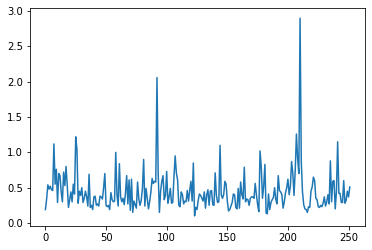

In [110]:
plt.plot(change)
plt.show()

In [108]:
print("The largest change in any one day based on high and low price is " + str(max(change)))

The largest change in any one day based on high and low price is 2.9000000000000004


In [ ]:
#Ex 5: What was the largest change between any two days (based on Closing Price)?

In [60]:
# collect the closing values of the stock in a list  "closing"

closing = [ row[4] for row in afx_data_dict if(str(row[4]) != 'None') ]

In [61]:
# find the difference in the consecutive values as "delta_close"

delta_close = [abs(closing[i]-closing[i+1]) for i in range(0,len(closing)-1) ]

In [111]:
print("The largest change between any two days based on closing price :" + str(max(delta_close)))

The largest change between any two days based on closing price :1.0199999999999996


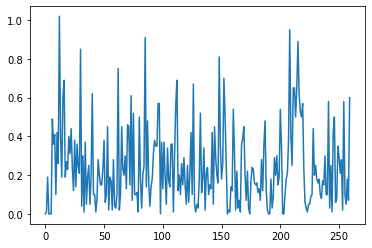

In [63]:
plt.plot(delta_close)
plt.show()

In [ ]:
# Ex 6: What was the average daily trading volume during this year?

In [69]:
# collect list of traded volume in a list "tradedVolume"

tradedVolume = [ row[6] for row in afx_data_dict if(str(row[6]) != 'None') ]

In [70]:
noOfVolume = len(tradedVolume)
sumOfVolume = sum(tradedVolume)
avgOfVolume = sumOfVolume/noOfVolume

In [112]:
print("The average trading volume this year :"+ str(avgOfVolume))

The average trading volume this year :95178.98850574713


In [ ]:
#Ex 7 : What was the median trading volume during this year.

In [85]:
totalValues = len(tradedVolume)

In [100]:
tradedVolume.sort()
if (totalValues%2 != 0) :
    median = tradedVolume[(totalValues//2) ]
else:
    med1 = tradedVolume[(totalValues//2) ]
    med2 = tradedVolume[(totalValues//2) - 1 ]
    median = (med1+med2)/2
    
print("the median is " +str(median)    )

the median is 66204.0
